In [1]:
import sys
import os
from pathlib import Path

# Automatically find the project root (assumes "src" is in the project)
current_file = Path(__file__).resolve() if '__file__' in locals() else Path.cwd()
project_root = current_file
while not (project_root / "src").exists() and project_root != project_root.parent:
    project_root = project_root.parent

# Ensure we found the correct project root
if not (project_root / "src").exists():
    raise FileNotFoundError("Could not find project root containing 'src' directory.")

# Set the working directory to the project root
os.chdir(project_root)
from src.compression.mps_ND import NDMPS
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from src.compression.utils_ND import *
import pickle as pkl

/Users/maxge/miniconda3/envs/QEL/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
mri_file = '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/Python for MRI/anat.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(240, 240, 220)


(240, 220)


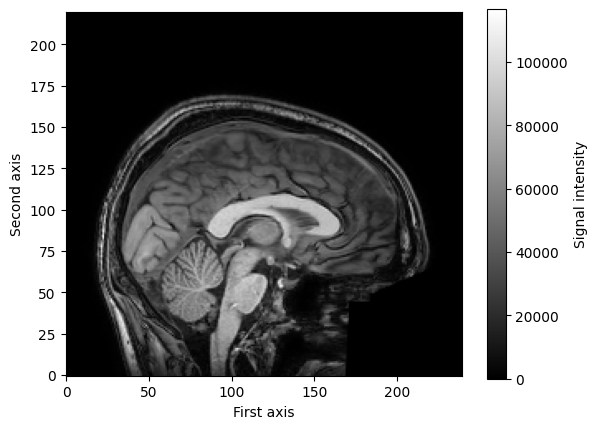

In [3]:
mid_slice_x = img_data[119, :, :]
print(mid_slice_x.shape)
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [11]:
mps = NDMPS.from_tensor(img_data, norm = False)

In [6]:
mps.compression_ratio()

np.float64(0.819056581439394)

In [7]:
mps.continuous_compress(0.03)

Compression ratio at 0.0003: 0.819056581439394
Compression ratio at 0.0015: 0.473772490530303
Compression ratio at 0.003: 0.41343158143939396
Compression ratio at 0.006: 0.40560961174242427
Compression ratio at 0.015: 0.3411134785353535
Compression ratio at 0.024: 0.25404379734848487
Compression ratio at 0.03: 0.2131445707070707


In [8]:
mps.compression_ratio()

np.float64(0.2131445707070707)

In [9]:
recovered_img = mps.to_tensor()

y: 10:220
z: :175
x: 40:200

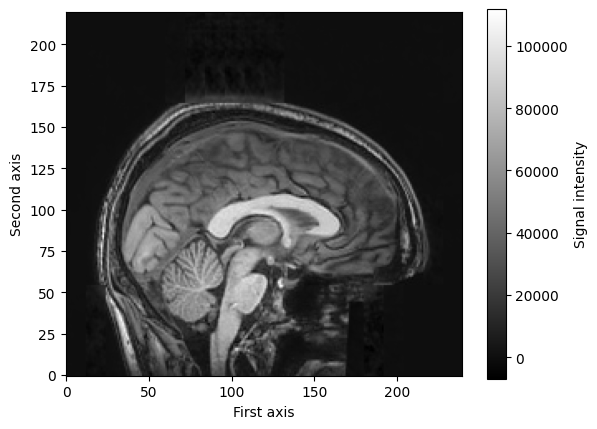

In [10]:
plt.imshow(recovered_img[119,:,:].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()